In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Movie Industry - Is It Worth It?

In [21]:
movie_budgets = pd.read_csv("data/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [23]:
movie_budgets[movie_budgets.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [24]:
def money_str_to_int(ms):
    return int(ms.lstrip("$").replace(",", ""))

In [25]:
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: money_str_to_int(x))
movie_budgets.domestic_gross = movie_budgets.domestic_gross.apply(lambda x: money_str_to_int(x))
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: money_str_to_int(x))
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [26]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [27]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [28]:
# domestic equals worldwide than only do domestic?
movie_budgets["P&L_percent"] = (movie_budgets.domestic_gross + movie_budgets.worldwide_gross - 
                        movie_budgets.production_budget)/movie_budgets.production_budget
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P&L_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,5.110105


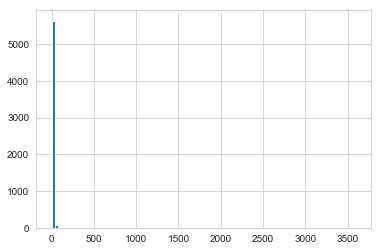

In [30]:
movie_budgets["P&L_percent"].hist(bins=100)
plt.show()

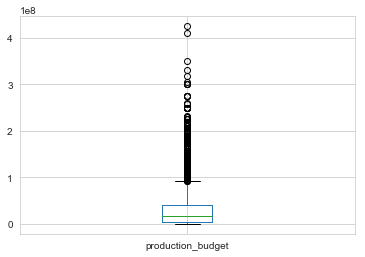

In [31]:
movie_budgets.production_budget.plot.box()
plt.show()

In [12]:
movie_budgets.loc[movie_budgets.production_budget < 10000].count()

id                   10
release_date         10
movie                10
production_budget    10
domestic_gross       10
worldwide_gross      10
P/L                  10
dtype: int64

In [13]:
movie_budgets.loc[movie_budgets.domestic_gross == 0].count()

id                   548
release_date         548
movie                548
production_budget    548
domestic_gross       548
worldwide_gross      548
P/L                  548
dtype: int64

In [14]:
movie_budgets.loc[movie_budgets.worldwide_gross == 0].count()

id                   367
release_date         367
movie                367
production_budget    367
domestic_gross       367
worldwide_gross      367
P/L                  367
dtype: int64

In [15]:
movie_budgets.loc[movie_budgets.worldwide_gross == movie_budgets.domestic_gross].count()

id                   1619
release_date         1619
movie                1619
production_budget    1619
domestic_gross       1619
worldwide_gross      1619
P/L                  1619
dtype: int64

In [16]:
movie_budgets.loc[(movie_budgets.domestic_gross == 0) & (movie_budgets.worldwide_gross == 0)].count()

id                   367
release_date         367
movie                367
production_budget    367
domestic_gross       367
worldwide_gross      367
P/L                  367
dtype: int64

Getting rid of 0 domestic **and** 0 worldwide

In [32]:
movie_budgets = movie_budgets[~((movie_budgets.domestic_gross == 0) & (movie_budgets.worldwide_gross == 0))]
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,P&L_percent
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,7.311240
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,56.714430
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,-0.999974
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,0.142115
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,1.947860
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,5.191397
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3599.000000


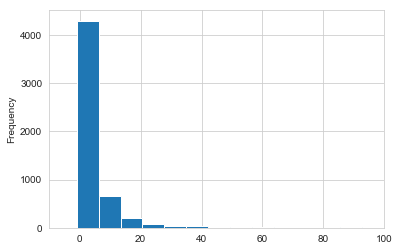

In [33]:
movie_budgets["P&L_percent"].plot.hist(bins=500, xlim=(-10,100))

In [34]:
movie_budgets["P&L_percent"].describe()

count    5415.000000
mean        7.311240
std        56.714430
min        -0.999974
25%         0.142115
50%         1.947860
75%         5.191397
max      3599.000000
Name: P&L_percent, dtype: float64

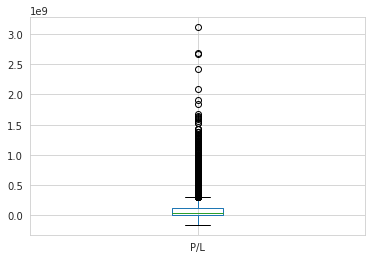

In [20]:
movie_budgets["P/L"].plot.box()

In [35]:
movie_budgets[movie_budgets["P&L_percent"]<=0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P&L_percent
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.449929
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-0.593717
220,21,"Jul 29, 2005",Stealth,138000000,32116746,76416746,-0.213525
223,24,"Jul 11, 2001",Final Fantasy: The Spirits Within,137000000,32131830,85131830,-0.144061
254,55,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,-0.133111
280,81,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,-0.239896
281,82,"Aug 27, 1999",The 13th Warrior,125000000,32698899,61698899,-0.244818
300,1,"Dec 17, 2010",How Do You Know?,120000000,30212620,49628177,-0.334660
340,41,"Jun 16, 2004",Around the World in 80 Days,110000000,24004159,72004159,-0.127197
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-0.943636


In [36]:
movie_budgets["P&L_percent"].mean()

7.311239618256728

- micro-budget: 0 to 500k [denote 0]
- low-budget: 500k to 3 mil [denote 1]
- big-budget: 3 mil to 50 mil [denote 2]
- mega-budget: anything higher [denote 3]

In [37]:
def get_budget_cat(pb):
    if pb <= 500000:
        return 0
    elif pb <= 3000000:
        return 1
    elif pb <= 50000000:
        return 2
    else:
        return 3

In [38]:
movie_budgets["budget_cat"] = movie_budgets.production_budget.apply(lambda x: get_budget_cat(x))
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,7.322007,3
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.133774,3
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.449929,3
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.632244,3
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,5.110105,3


In [39]:
micro_budget = movie_budgets[movie_budgets.budget_cat == 0]

In [40]:
low_budget = movie_budgets[movie_budgets.budget_cat == 1]

In [41]:
big_budget = movie_budgets[movie_budgets.budget_cat == 2]

In [42]:
mega_budget = movie_budgets[movie_budgets.budget_cat == 3]

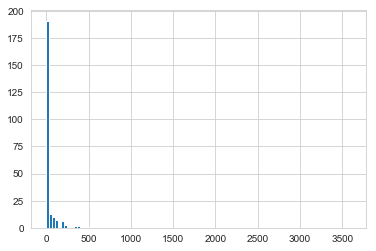

In [43]:
micro_budget["P&L_percent"].hist(bins = 100)

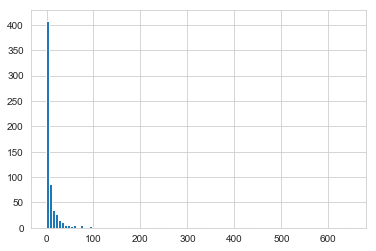

In [45]:
low_budget["P&L_percent"].hist(bins = 100)

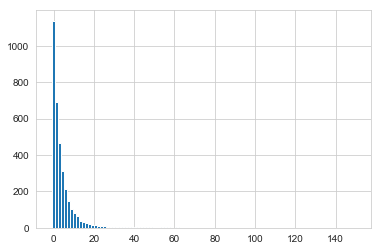

In [46]:
big_budget["P&L_percent"].hist(bins = 100)

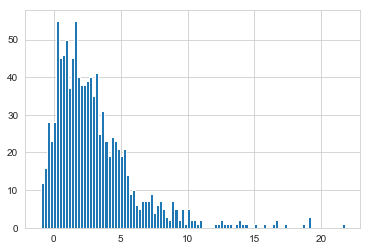

In [47]:
mega_budget["P&L_percent"].hist(bins = 100)

In [33]:
micro_budget["P&L_percent"].describe()

count    2.430000e+02
mean     7.982881e+06
std      2.566009e+07
min     -4.989440e+05
25%     -6.079250e+04
50%      4.472300e+05
75%      4.668235e+06
max      3.016518e+08
Name: P/L, dtype: float64

In [48]:
low_budget["P&L_percent"].describe()

count    626.000000
mean      12.461433
std       42.767696
min       -0.999974
25%       -0.645149
50%        1.769489
75%        9.818285
max      647.065165
Name: P&L_percent, dtype: float64

In [49]:
big_budget["P&L_percent"].describe()

count    3473.000000
mean        4.179003
std         8.606183
min        -0.999769
25%         0.016700
50%         1.816833
75%         5.018284
max       150.078375
Name: P&L_percent, dtype: float64

In [50]:
mega_budget["P&L_percent"].describe()

count    1073.000000
mean        2.979821
std         3.042413
min        -0.992057
25%         0.886061
50%         2.341332
75%         4.179046
max        21.770173
Name: P&L_percent, dtype: float64

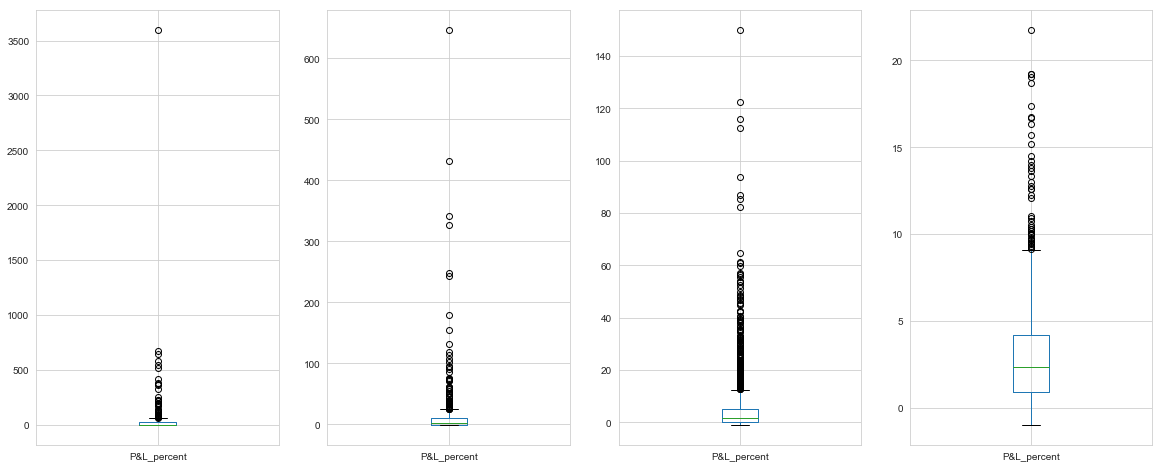

In [90]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget["P&L_percent"].plot.box()

ax2 = fig.add_subplot(142)
low_budget["P&L_percent"].plot.box()

ax3 = fig.add_subplot(143)
big_budget["P&L_percent"].plot.box()

ax4 = fig.add_subplot(144)
mega_budget["P&L_percent"].plot.box()

In [117]:
movie_budgets_adj = movie_budgets
movie_budgets_adj.describe()

,id,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000,5415.000000
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07,7.311240,1.992798
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08,56.714430,0.702352
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01,-0.999974,0.000000
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06,0.142115,2.000000
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07,1.947860,2.000000
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08,5.191397,2.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3599.000000,3.000000


In [118]:
#drop movies that have domestic sales == to worldwide sales as we think it is bad user input
movie_budgets_adj = movie_budgets_adj.loc[~(movie_budgets_adj.worldwide_gross == movie_budgets_adj.domestic_gross)]

In [119]:
movie_budgets_adj.describe()

,id,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
count,4163.000000,4.163000e+03,4.163000e+03,4.163000e+03,4163.000000,4163.000000
mean,49.945232,3.942112e+07,5.348695e+07,1.223961e+08,6.872748,2.106173
std,28.545265,4.603149e+07,7.629709e+07,1.970383e+08,29.646932,0.660383
min,1.000000,6.000000e+03,0.000000e+00,2.600000e+01,-0.999974,0.000000
25%,25.000000,1.000000e+07,5.503604e+06,1.371569e+07,0.535785,2.000000
50%,50.000000,2.500000e+07,2.832813e+07,5.246054e+07,2.374278,2.000000
75%,74.000000,5.000000e+07,6.844674e+07,1.469653e+08,5.478041,2.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,670.337431,3.000000


In [116]:
#drop movies with budgets less than $50K as they too small for our client
movie_budgets_adj = movie_budgets_adj.loc[~(movie_budgets_adj.production_budget < 50000)]
movie_budgets_adj.describe()

,id,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
count,4130.000000,4.130000e+03,4.130000e+03,4.130000e+03,4130.000000,4130.000000
mean,49.117191,3.646435e+07,3.274633e+07,7.288376e+07,1.340182,2.067554
std,28.855648,4.321220e+07,4.926925e+07,1.313119e+08,1.809441,0.659552
min,1.000000,5.000000e+04,0.000000e+00,2.600000e+01,-0.999974,0.000000
25%,24.000000,8.000000e+06,1.544095e+06,4.498465e+06,-0.238572,2.000000
50%,48.000000,2.155000e+07,1.460807e+07,2.366890e+07,1.005959,2.000000
75%,74.000000,5.000000e+07,4.276029e+07,7.926275e+07,2.702766,2.000000
max,100.000000,4.106000e+08,6.201814e+08,1.403014e+09,5.495607,3.000000


In [129]:
#drop movies with P&L above 75% (4th Quartile), this will still capture outstanding P&Ls of more than 500% profit
movie_budgets_adj = movie_budgets_adj.loc[~(movie_budgets_adj['P&L_percent'] > 5.5)]

In [130]:
movie_budgets_adj.describe()

,id,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
count,3125.000000,3.125000e+03,3.125000e+03,3.125000e+03,3125.000000,3125.00000
mean,48.698880,4.334721e+07,3.963879e+07,9.268442e+07,1.603523,2.18336
std,28.565499,4.681818e+07,5.416060e+07,1.452531e+08,1.778822,0.61769
min,1.000000,3.000000e+04,0.000000e+00,2.600000e+01,-0.999974,0.00000
25%,24.000000,1.200000e+07,3.127773e+06,1.007065e+07,0.134557,2.00000
50%,48.000000,2.850000e+07,2.080417e+07,3.913498e+07,1.375971,2.00000
75%,73.000000,6.000000e+07,5.345832e+07,1.086427e+08,2.975038,3.00000
max,100.000000,4.106000e+08,6.201814e+08,1.403014e+09,5.495607,3.00000


In [131]:
movie_budgets_adj.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,P&L_percent,budget_cat
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.133774,3
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-0.449929,3
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.632244,3
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,5.110105,3
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,3.242803,3


In [132]:
movie_budgets_adj['P&L_percent'].loc[(movie_budgets_adj['P&L_percent']<0)].count()

717

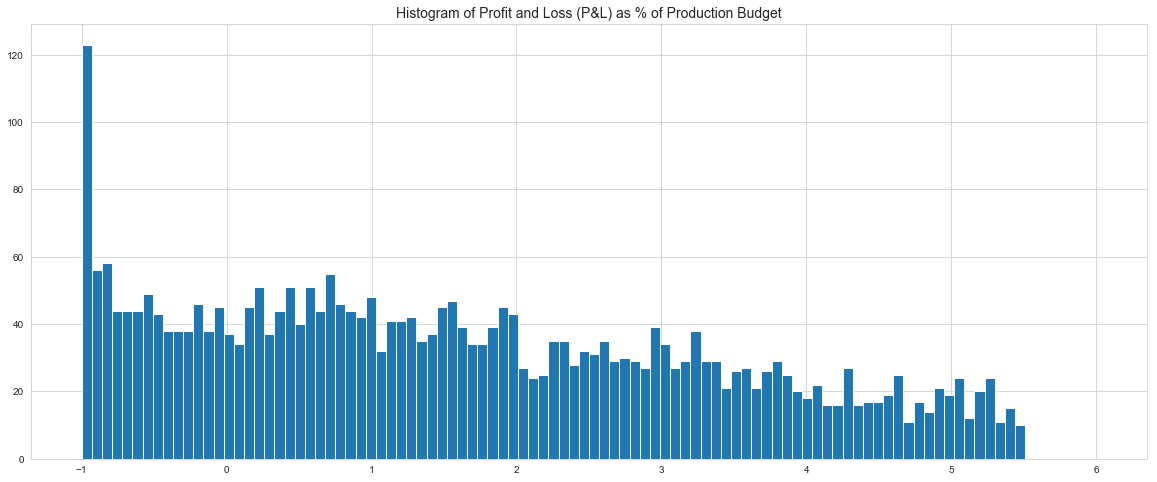

In [142]:
plt.figure(figsize = (20,8))
plt.title('Histogram of Profit and Loss (P&L) as % of Production Budget', fontsize = 14)
data = movie_budgets_adj['P&L_percent']
plt.hist(x = data, bins = 100, range = (-1, 6))
# to do: show 717 titles with P&L <0 in red color, also convert x-axis in % from -100% to 550%
plt.show()

In [92]:
micro_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 0]
low_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 1]
big_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 2]
mega_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 3]

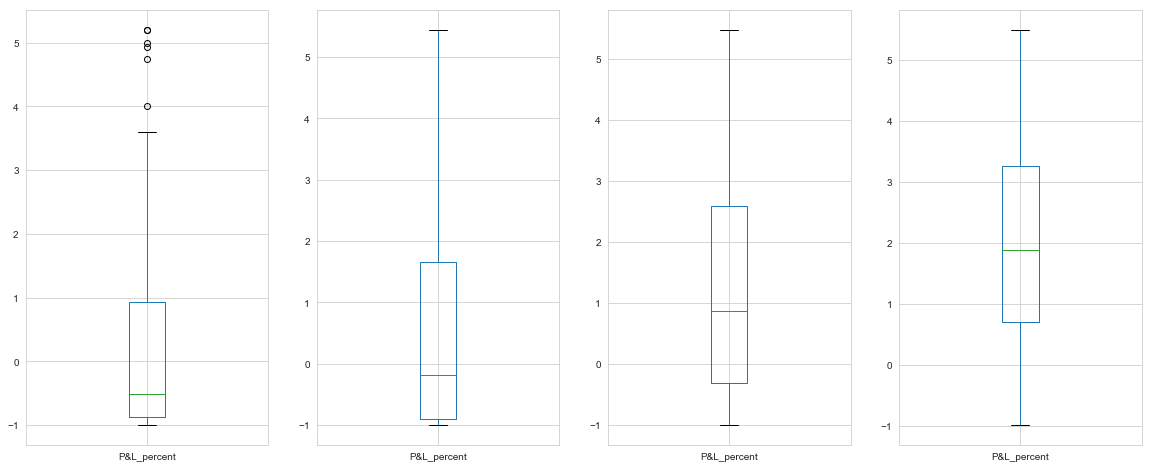

In [94]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget_adj["P&L_percent"].plot.box()

ax2 = fig.add_subplot(142)
low_budget_adj["P&L_percent"].plot.box()

ax3 = fig.add_subplot(143)
big_budget_adj["P&L_percent"].plot.box()

ax4 = fig.add_subplot(144)
mega_budget_adj["P&L_percent"].plot.box()

plt.show()

# Based on our findings below (see 4 boxplot charts) it is our recommendation to avoid micro-budget (<=$.5M) and 
# low badget (<=$3M) strategies as these movies tend to have larger volatility of ticket sales and may lose money. 
# Big-budget (<=$50M) and mega-budget strategies seem to be warranted from expected profitability stand point of view.

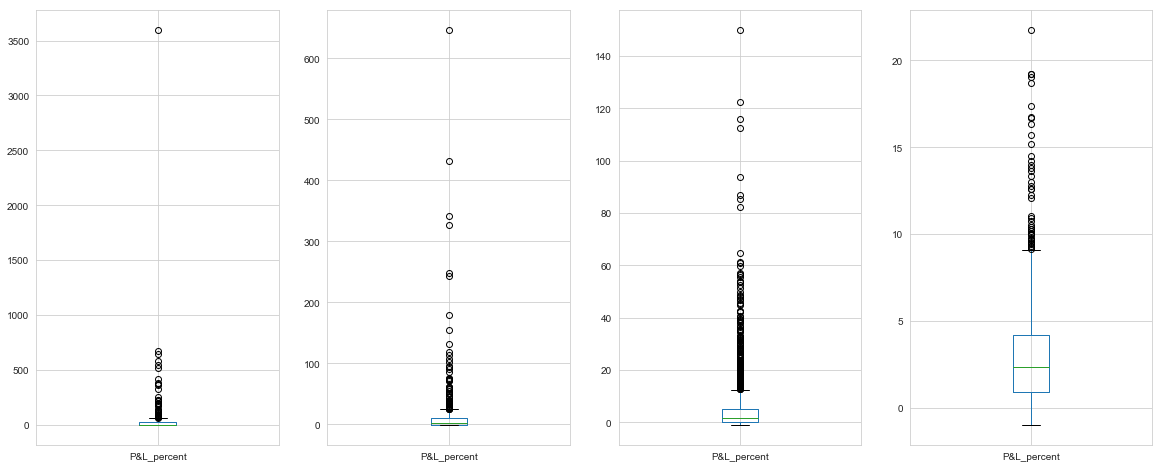

In [123]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget["P&L_percent"].plot.box()

ax2 = fig.add_subplot(142)
low_budget["P&L_percent"].plot.box()

ax3 = fig.add_subplot(143)
big_budget["P&L_percent"].plot.box()

ax4 = fig.add_subplot(144)
mega_budget["P&L_percent"].plot.box()

plt.show()